In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# swarm parameters
number_of_nodes = 104
number_of_subgroups = 8

# network appearance
node_size = 20
edge_width = 2.0

# figure dimensions
fig_width = 7.5
fig_height = 7.5

### plotting functions

In [ ]:
def plot_nodes(input_G):

  G = input_G.copy()

  plt.figure(figsize = (fig_width, fig_height))

  nx.draw_networkx_nodes(G, pos = node_positions, node_size = node_size)

  plt.savefig('node.jpg', dpi = 200)
  plt.show()

In [ ]:
def plot_nodes_edges(input_G, distance_parameter):

  G = input_G.copy()

  for i in range(number_of_nodes):

    for j in range(i):

      node_i = np.array([random_x_coords[i], random_y_coords[i]])
      node_j = np.array([random_x_coords[j], random_y_coords[j]])

      distance = np.linalg.norm(node_i - node_j)

      if distance < distance_parameter:

        G.add_edge(i, j)

  plt.figure(figsize = (fig_width, fig_height))

  nx.draw_networkx_nodes(G, pos = node_positions, node_size = node_size)
  nx.draw_networkx_edges(G, pos = node_positions, width = edge_width)

  plt.title('$\epsilon$ = ' + str(distance_parameter), fontsize = 18)

  plt.savefig('edge' + str(int(100*distance_parameter)) + '.jpg', dpi = 200)
  plt.show()

  return G

In [ ]:
def plot_nodes_edges_triangles(input_G, distance_parameter):

  G = input_G.copy()

  nodes_of_triangles = [clique for clique in nx.enumerate_all_cliques(G) if len(clique) == 3]

  plt.figure(figsize = (fig_width, fig_height))

  for triangle in nodes_of_triangles:

    node1 = triangle[0]
    x1 = random_x_coords[node1]
    y1 = random_y_coords[node1]

    node2 = triangle[1]
    x2 = random_x_coords[node2]
    y2 = random_y_coords[node2]

    node3 = triangle[2]
    x3 = random_x_coords[node3]
    y3 = random_y_coords[node3]

    triangle_x_coords = [x1, x2, x3, x1] 
    triangle_y_coords = [y1, y2, y3, y1]  

    plt.fill(triangle_x_coords, triangle_y_coords, 'y', zorder = 0.5)  
      # set zorder so triangles don't cover edges

  nx.draw_networkx_nodes(G, pos = node_positions, node_size = node_size)
  nx.draw_networkx_edges(G, pos = node_positions, width = edge_width)

  plt.title('$\epsilon$ = ' + str(distance_parameter), fontsize = 18)

  plt.savefig('triangle' + str(int(100*distance_parameter)) + '.jpg', dpi = 200)
  plt.show()

### populate nodes

In [ ]:
number_per_group = int(number_of_nodes / number_of_subgroups)
angle_increment = 2*np.pi / number_of_subgroups

starting_angles = [j*angle_increment for j in range(number_of_subgroups)]
ending_angles = [(j+0.6)*angle_increment for j in range(number_of_subgroups)]

In [ ]:
np.random.seed(42)
random_radii = np.random.normal(1.0, 0.08, number_of_nodes)

np.random.seed(42)
random_angles = [np.random.uniform(starting_angles[i], ending_angles[i], number_per_group) for i in range(number_of_subgroups)]
random_angles = np.array(random_angles).flatten()

In [ ]:
random_x_coords = np.multiply(random_radii, np.cos(random_angles))
random_y_coords = np.multiply(random_radii, np.sin(random_angles))

In [ ]:
node_positions = {}

for i in range(number_of_nodes):

  node_positions[i] = np.array([random_x_coords[i], random_y_coords[i]])

In [ ]:
swarm = nx.Graph()
swarm.add_nodes_from([i for i in range(number_of_nodes)])

### output

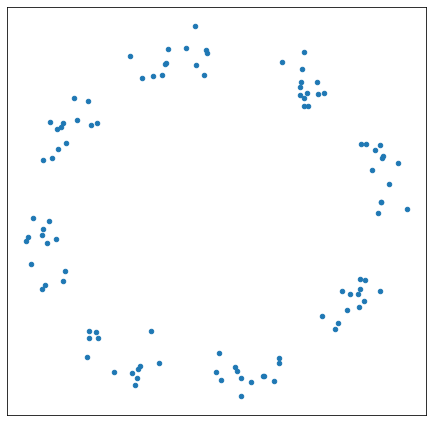

In [ ]:
plot_nodes(swarm)

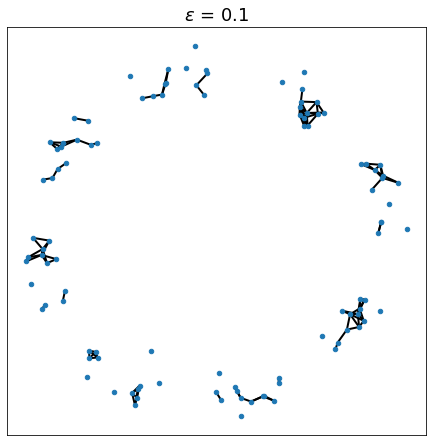

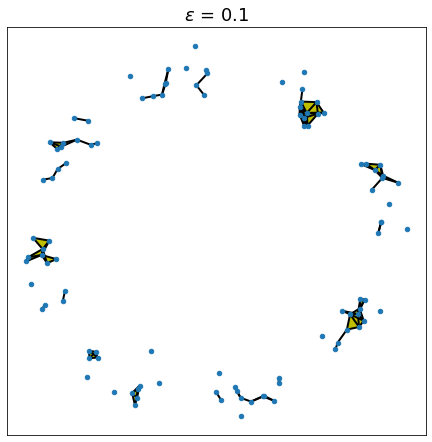

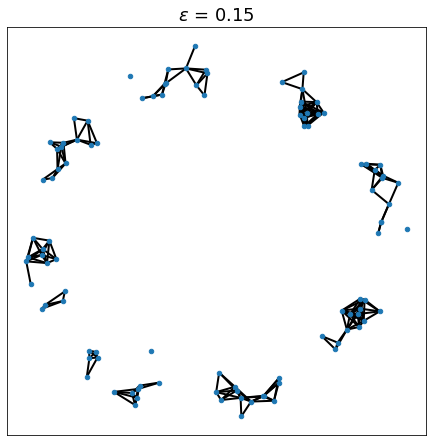

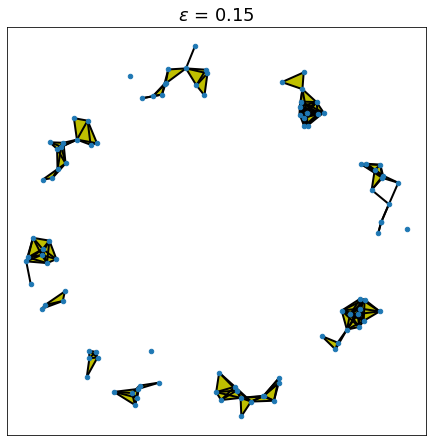

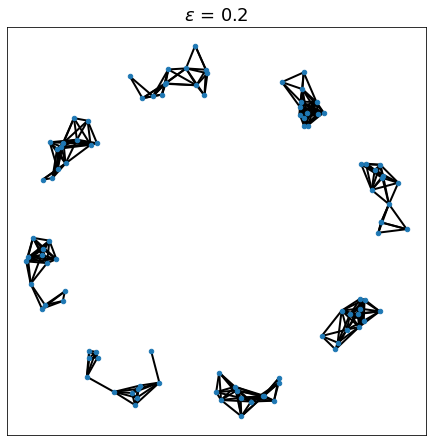

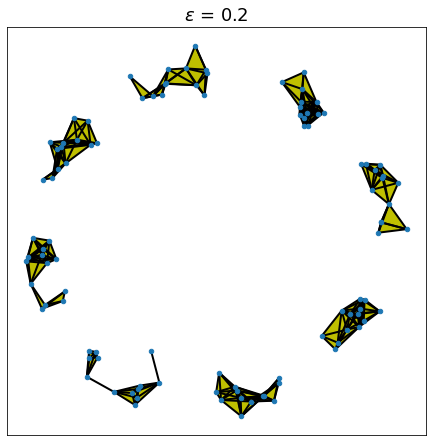

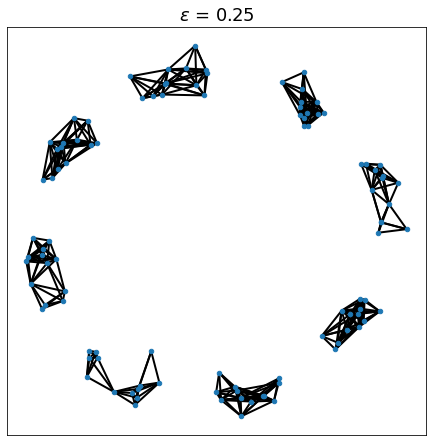

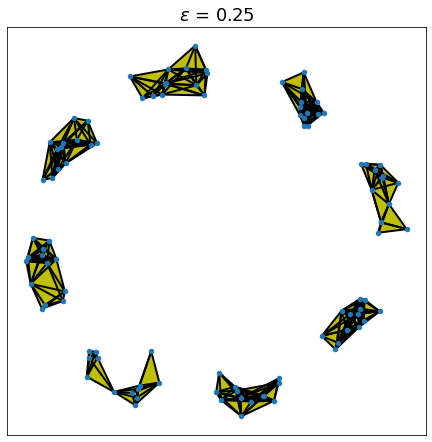

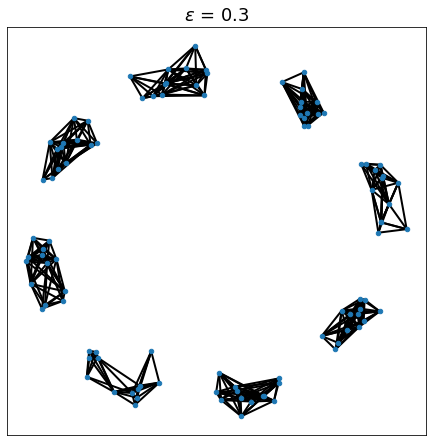

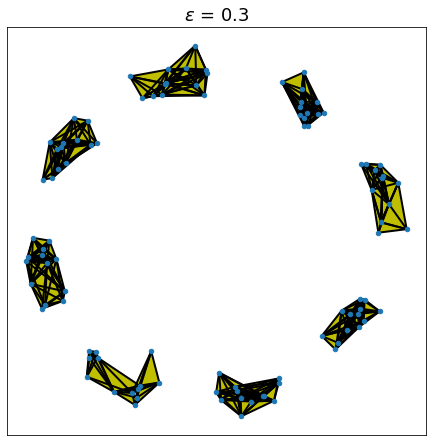

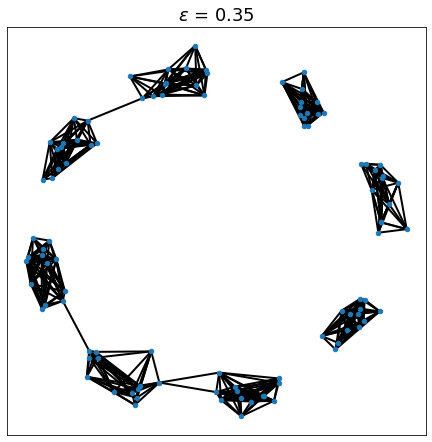

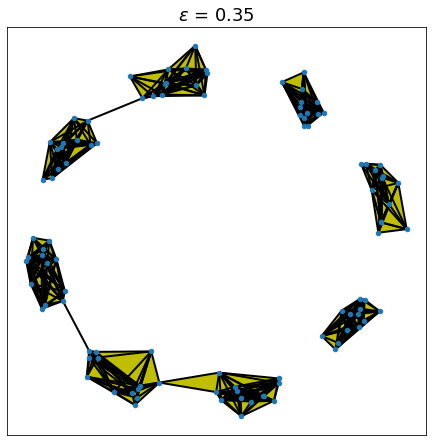

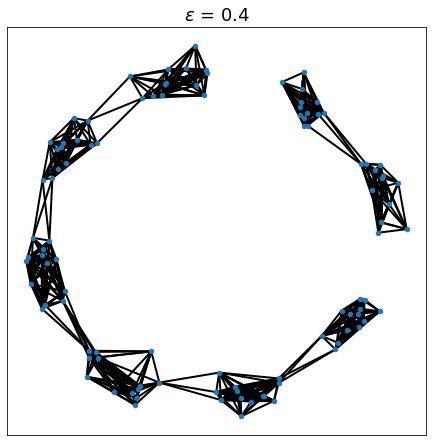

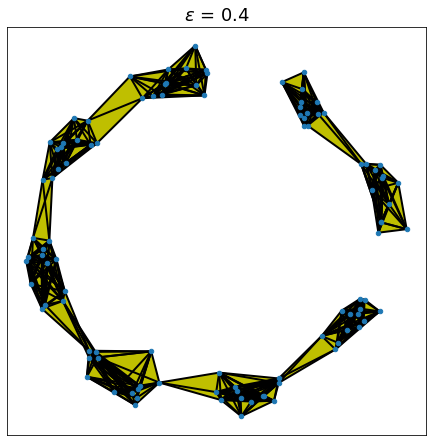

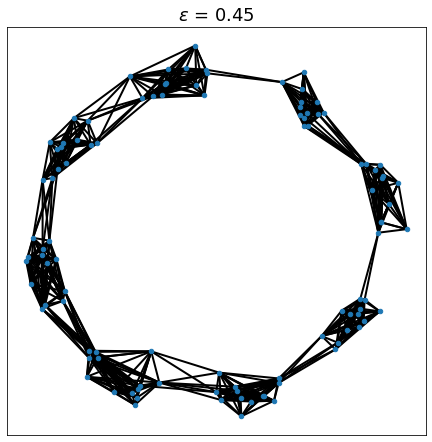

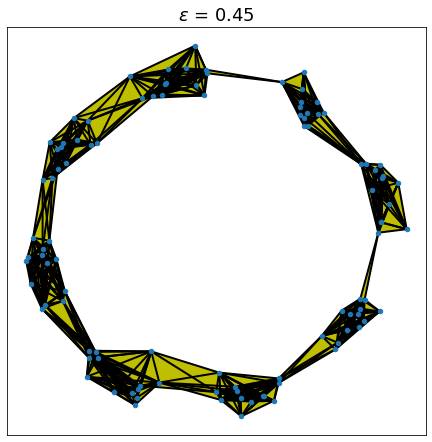

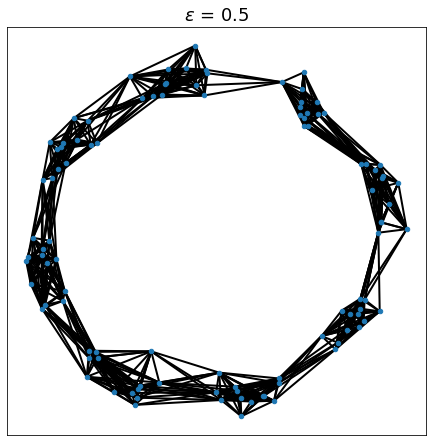

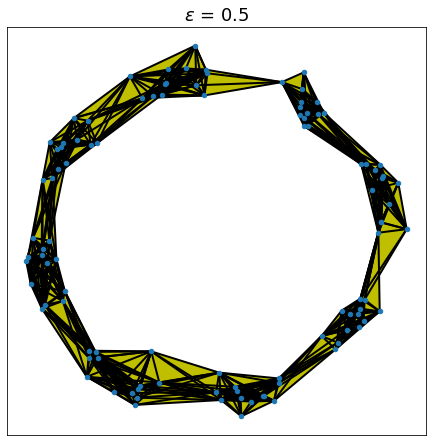

In [ ]:
for k in range(2, 11, 1):

  epsilon = round(0.05*k, 2)

  swarm_edges = plot_nodes_edges(swarm, epsilon)
  plot_nodes_edges_triangles(swarm_edges, epsilon)